In [1]:
using JSON3
using Dates
using Plots

In [2]:
path = "./data/sales_2016-2021-level4.json"
str = read(path)
json = JSON3.read(str);

In [3]:
println("Número de series = ", length(json))
k=1
println("\n Ejemplo k=",k)
println("name = ",json[k].name)
println("length = ",length(json[k].points))

i=3
println("\n Ejemplo i=",i)
println(json[k].points[i])

Número de series = 631

 Ejemplo k=1
name = 03010201
length = 274

 Ejemplo i=3
{
      "x": 2394,
      "y": 7404,
   "date": "2016-01-18"
}


In [8]:
include("./src/utils.jl")

jsonpoints2array (generic function with 2 methods)

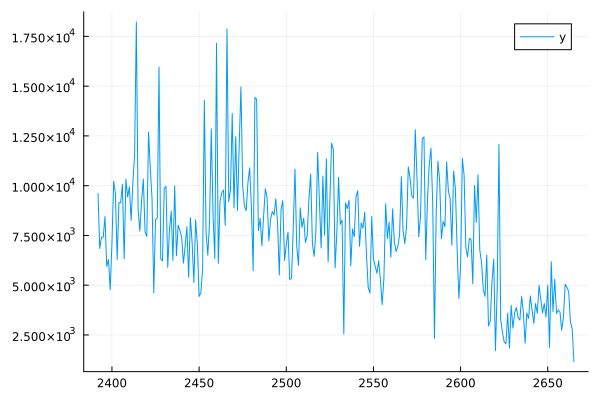

In [66]:
k=1
x, y = jsonpoints2array(json[k].points)

fig = plot()
plot!(x, y, label="y")

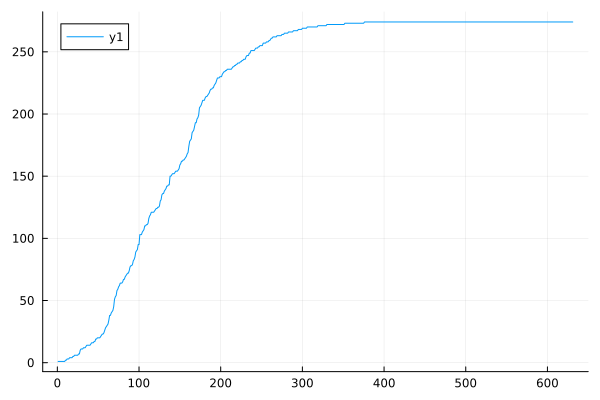

In [10]:
n = length(json)
L = [length(json[k].points) for k =1:n]

plot(sort(L))

In [65]:
for k = 1:60
    x, y = jsonpoints2array(json[k].points)
    if length(x) > 1
        println("k = ", k, ", max x gap = ", maximum(x[2:end]-x[1:end-1]), ", min y = ", minimum(y))
    else
        println("k = ", k)
    end
end

k = 1, max x gap = 1, min y = 1170
k = 2, max x gap = 2, min y = 2
k = 3, max x gap = 3, min y = 4
k = 4, max x gap = 3, min y = 1
k = 5, max x gap = 1, min y = 211
k = 6, max x gap = 19, min y = 1
k = 7, max x gap = 4, min y = 1
k = 8, max x gap = 37, min y = 1
k = 9, max x gap = 24, min y = 1
k = 10, max x gap = 2, min y = 4
k = 11, max x gap = 1, min y = 2
k = 12, max x gap = 16, min y = 1
k = 13, max x gap = 9, min y = 1
k = 14, max x gap = 2, min y = 1
k = 15, max x gap = 10, min y = 1
k = 16, max x gap = 1, min y = 4
k = 17, max x gap = 1, min y = 73
k = 18, max x gap = 1, min y = 5
k = 19, max x gap = 1, min y = 103
k = 20, max x gap = 2, min y = 1
k = 21, max x gap = 5, min y = 1
k = 22, max x gap = 1, min y = 2
k = 23, max x gap = 4, min y = 1
k = 24, max x gap = 3, min y = 2
k = 25, max x gap = 3, min y = 2
k = 26, max x gap = 3, min y = 3
k = 27, max x gap = 1, min y = 169
k = 28
k = 29, max x gap = 2, min y = 2
k = 30, max x gap = 1, min y = 2
k = 31, max x gap = 2, min y =

In [97]:
n = length(json)
series = []
xs = []
for k = 1:n
    x, y = jsonpoints2array(json[k].points)

    series = [series..., y]
    xs = [xs..., x]
end
max_x = maximum(maximum.(xs))
min_x = minimum(minimum.(xs))
#println("min_x = ", min_x)
#println("max_x = ", max_x)
m = max_x - min_x

Y = zeros(m,n)

for k = 1:n
    for i = 1:m
        #println("k=",k,", i=",i)
        data = series[k][xs[k].==min_x+i-1]
        if length(data)>0
            Y[i,k] = data[1]
        else
            Y[i,k] = 0
        end
    end
end

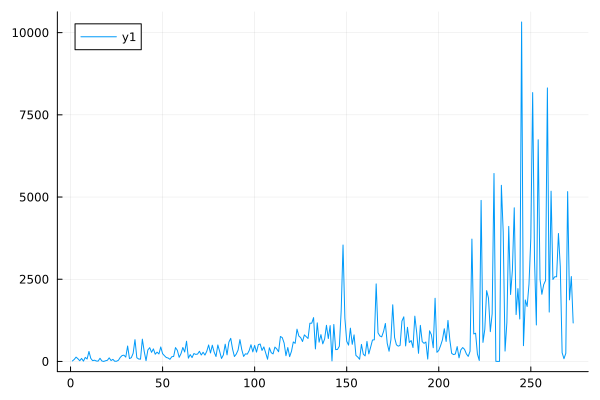

In [96]:
plot(Y[:,2])